<a href="https://colab.research.google.com/github/uofldmlab/IntroDMLab/blob/main/demo_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libraries
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [ ]:
#open datafile and store into Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/uofldmlab/IntroDMLab/main/processed.cleveland.data")
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'to_predict']

#keep only age and resting_blood_pressure columns
df = df[['age','resting_blood_pressure']]


In [ ]:
df.head()

,age,resting_blood_pressure
0,67.0,160.0
1,67.0,120.0
2,37.0,130.0
3,41.0,130.0
4,56.0,120.0


In [ ]:
#Compute X and Y lists for Linear Regression
X = df[['age']]
Y = df['resting_blood_pressure']

In [ ]:
#split dataframe into 80% training/20% test dataframes
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.80, random_state=100)


In [ ]:
#construct linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#make predictions
y_predicted = model.predict(X_test)

In [ ]:
# model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

In [ ]:
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MAE is 13.217820277787725
MSE is 293.1437695088338
R2 score is 0.07510479522104563


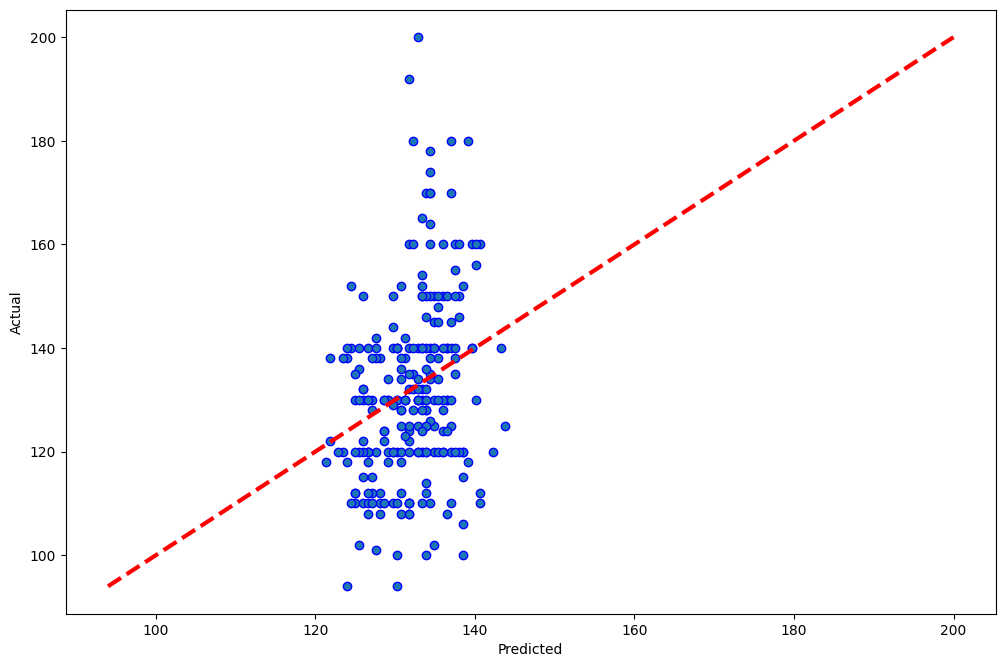

In [ ]:
#plot
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
#get coefficient and intercept values
intercept = model.intercept_
coef = model.coef_[0]

In [ ]:
print("Equation: y="+str(coef)+"*x + "+str(intercept))

Equation: y=0.5223631119227419*x + 103.55557063042187
